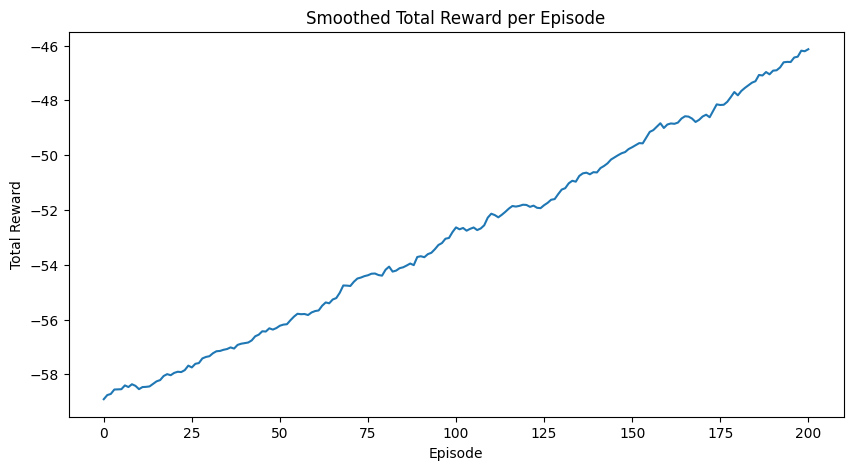

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- PLOTTING FUNCTION ---
def plot_rewards(rewards, file_name, smoothing_window=100, save_path="plots"):
    smoothed = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(smoothed)
    plt.title("Smoothed Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.savefig(f"{save_path}/{file_name}.png")
    plt.show()

    # plt.figure(figsize=(10, 5))
    # plt.plot(rewards)
    # plt.title("Total Reward per Episode")
    # plt.xlabel("Episode")
    # plt.ylabel("Total Reward")
    # plt.savefig(f"{save_path}/{file_name}_rewards.png")
    # plt.show()
file_name="dqn_gray_alpha_05_gamma09"
rewards = np.load(f"arrays/{file_name}.npy")
plot_rewards(rewards, file_name)